In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

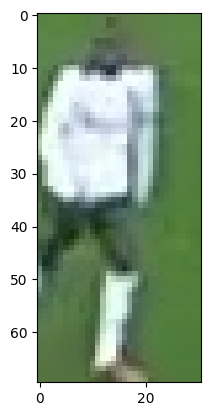

In [3]:
plt.imshow(image)
plt.show()

### Take Top half of image

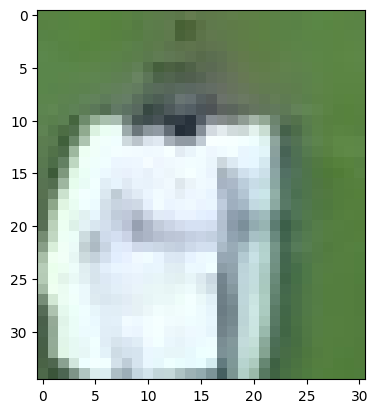

In [4]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

### Cluster the image into two clusters

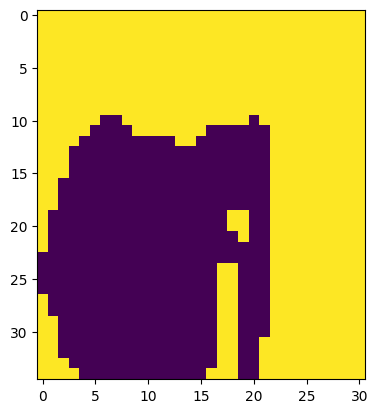

In [8]:
# Reshape image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into original image shape
clustered_image = labels.reshape(
    top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [9]:
# Gets the colors of the corners of image and picks the most abundant one to be background color, since background is most likely in the corners than not

corners_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corners_clusters), key=corners_clusters.count)
print(non_player_cluster)

1


In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [11]:
kmeans.cluster_centers_[player_cluster]

array([215.99327354, 231.18834081, 234.58295964])